In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [127]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [106]:
df = pd.read_csv("4days.csv", sep = ',')

In [80]:
df.head()

,Total_\n Population,Income,Education_Bsc_over,Crime_per_100k
State,,,,
Alabama,5108468,60660,"28,9",404
Alaska,733406,98190,"32,2",726
Arizona,7431344,82660,"33,5",409
Arkansas,3067732,63250,"26,2",620
California,38965193,89870,"37,5",508


In [13]:
df.dtypes

State                  object
Total_\n Population     int64
Income                  int64
Education_Bsc_over     object
Crime_per_100k          int64
dtype: object

In [107]:
df['Education_Bsc_over'] = df['Education_Bsc_over'].str.replace(',', '.').astype(float)

In [22]:
param = df[['Total_\n Population', 'Income', 'Education_Bsc_over', 'Crime_per_100k']]

In [23]:
correlation_matrix = df.corr(numeric_only=True)

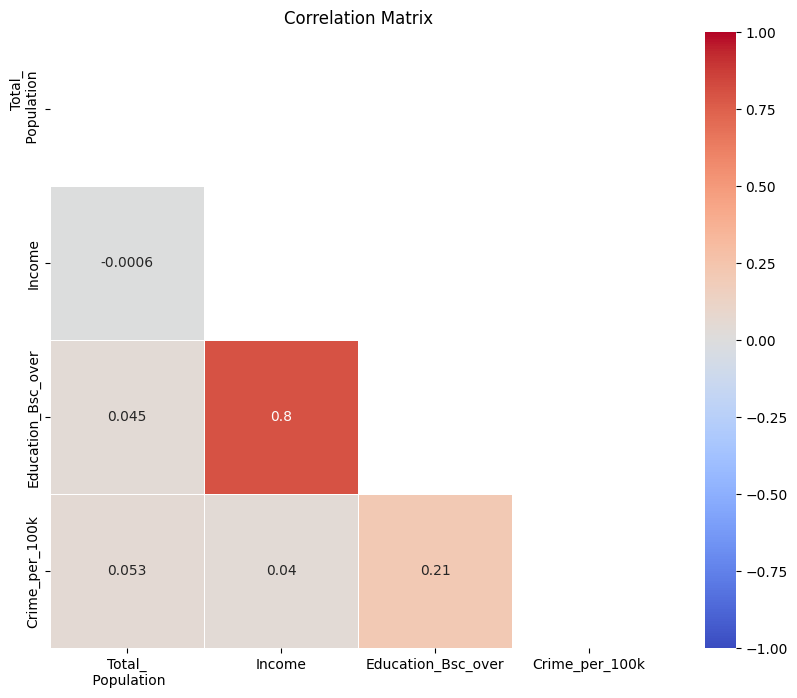

In [27]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

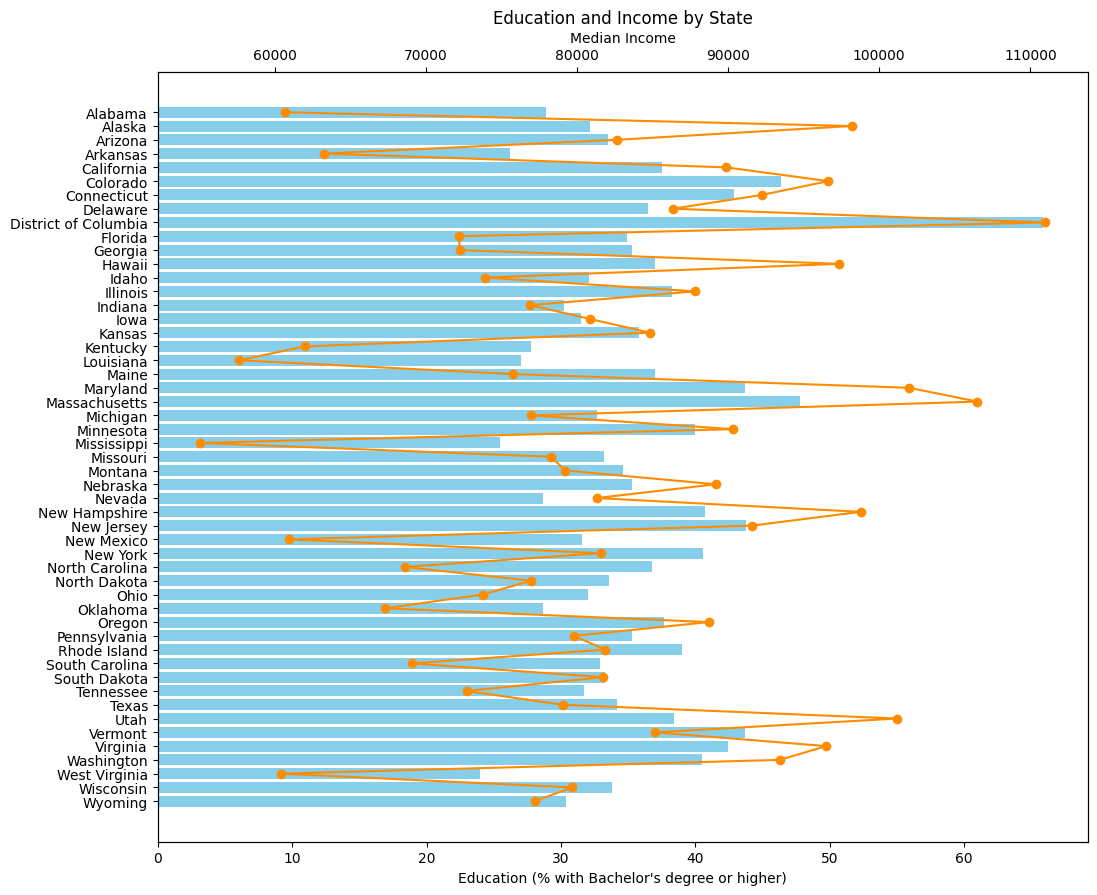

In [35]:
states = df['State']
education = df['Education_Bsc_over']  # % с высшим
income = df['Income']  # средний доход

fig, ax1 = plt.subplots(figsize=(12, 10))

# Горизонтальные бары — образование
ax1.barh(states, education, color='skyblue')
ax1.set_xlabel('Education (% with Bachelor\'s degree or higher)')
ax1.invert_yaxis()  # чтобы сверху был первый штат

# Создаем вторую ось Y, разделяем её с ax1 по оси X
ax2 = ax1.twiny()

y_pos = np.arange(len(states))
ax2.plot(income, y_pos, color='darkorange', marker='o')
ax2.set_xlabel('Median Income')

# Ось Y у ax2 отключаем (чтобы не дублировать подписи)
ax2.yaxis.set_visible(False)

plt.title('Education and Income by State')
plt.show()

In [92]:
gdf = gpd.read_file('C:/Users/Liza/Documents/my_data/environmental/GIS/challenge/day_4/us_states_hexgrid.geojson.json') 
#gdf = gdf[~gdf['NAME'].isin(['Puerto Rico'])]

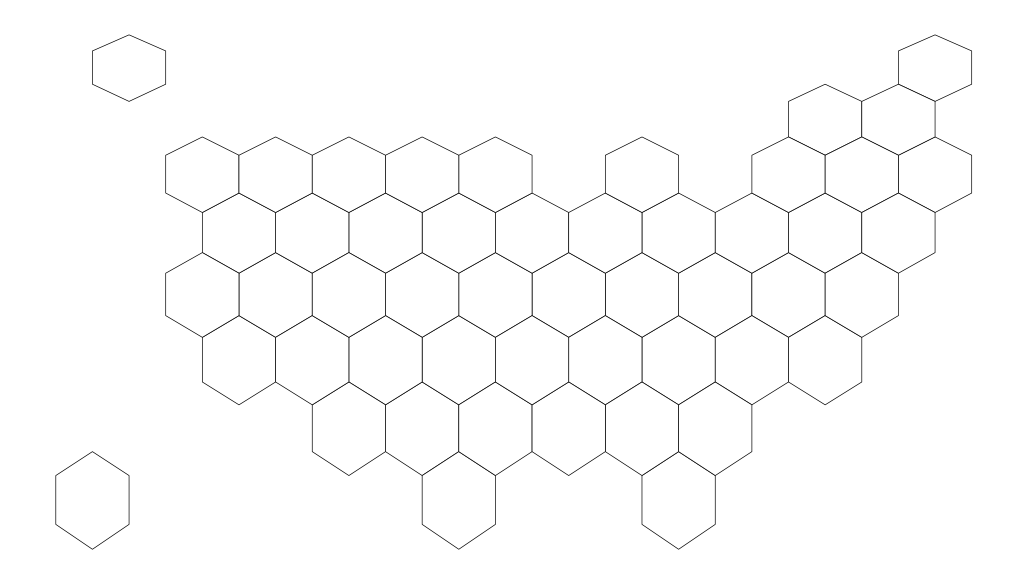

In [94]:
plt.rcParams["figure.figsize"]=13,13
gdf.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

In [100]:
gdf.head()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,State
0,1219,2015-05-13 22:26:15+00:00,2015-10-05 16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.3132, -69.90286 54.4084...",POINT (-72.62574 53.45575),Maine
1,1217,2015-05-13 22:24:35+00:00,2015-10-05 16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.4642),Rhode Island
2,1218,2015-05-13 22:25:00+00:00,2015-10-05 16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),Vermont
3,231,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),Oklahoma
4,244,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.5301, -88.96298 38.3070...",POINT (-91.68585 37.03536),North Carolina


In [138]:
DC = gdf_merged[gdf_merged['iso3166_2'] == 'DC']

In [139]:
DC

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,Total_\n Population,Income,Education_Bsc_over,Crime_per_100k
State,,,,,,,,,,,,,
District of Columbia,242,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,D.C.,NaN,DC,District of Columbia (United States),"POLYGON ((-80.79436 39.5301, -78.07148 38.3070...",POINT (-80.79436 37.03536),678972,111000,65.9,1151


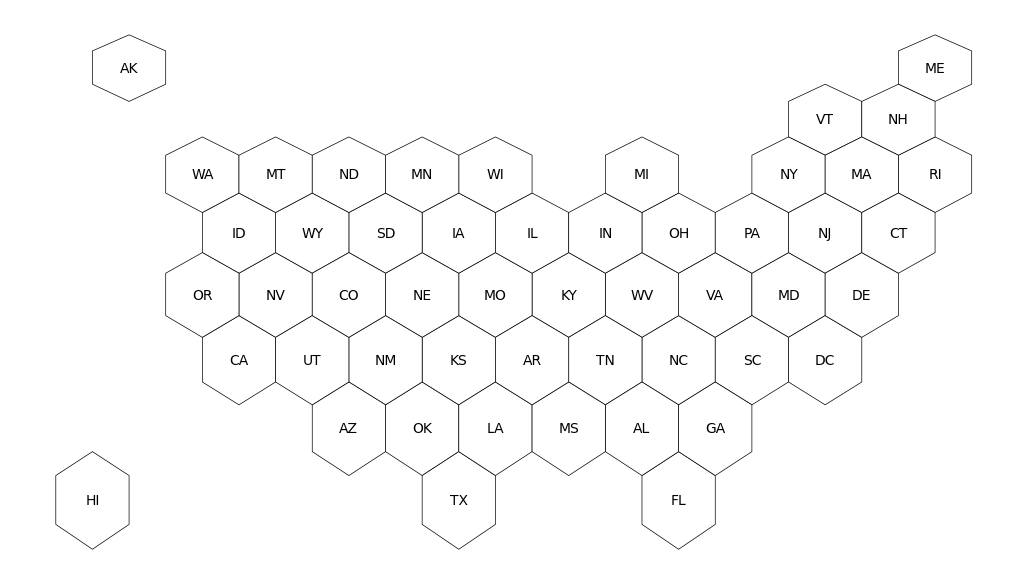

In [102]:
gdf['centroid'] = gdf['geometry'].apply(lambda x: x.centroid)

gdf.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

for idx, row in gdf.iterrows():
    plt.annotate(row['iso3166_2'], xy=row['centroid'].coords[0], ha='center', va='center')

In [99]:
gdf['State'] = gdf['google_name'].str.replace(r' \(United States\)', '', regex=True)

In [104]:
df.head()

,Total_\n Population,Income,Education_Bsc_over,Crime_per_100k
State,,,,
Alabama,5108468,60660,28.9,404
Alaska,733406,98190,32.2,726
Arizona,7431344,82660,33.5,409
Arkansas,3067732,63250,26.2,620
California,38965193,89870,37.5,508


In [108]:
gdf_merged = gdf.set_index('State').join(df.set_index('State'))

In [109]:
gdf_merged

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,Total_\n Population,Income,Education_Bsc_over,Crime_per_100k
State,,,,,,,,,,,,,
Maine,1219,2015-05-13 22:26:15+00:00,2015-10-05 16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.3132, -69.90286 54.4084...",POINT (-72.62574 53.45575),1395722,75740,37.0,102
Rhode Island,1217,2015-05-13 22:24:35+00:00,2015-10-05 16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.4642),1095962,81860,39.0,168
Vermont,1218,2015-05-13 22:25:00+00:00,2015-10-05 16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),647464,85190,43.7,210
Oklahoma,231,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),4053824,67330,28.7,414
North Carolina,244,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.5301, -88.96298 38.3070...",POINT (-91.68585 37.03536),10835491,68610,36.8,391
Virginia,259,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Va.,45.6,VA,Virginia (United States),"POLYGON ((-88.96298 43.0717, -86.2401 41.91257...",POINT (-88.96298 40.70358),8715698,96490,42.4,236
West Virginia,260,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,W.Va.,59.5,WV,West Virginia (United States),"POLYGON ((-94.40873 43.0717, -91.68585 41.9125...",POINT (-94.40873 40.70358),1770071,60410,24.0,265
California,250,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Calif.,40.1,CA,California (United States),"POLYGON ((-124.36033 39.5301, -121.63746 38.30...",POINT (-124.36033 37.03536),38965193,89870,37.5,508
Kansas,247,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Kan.,40.8,KS,Kansas (United States),"POLYGON ((-108.02309 39.5301, -105.30022 38.30...",POINT (-108.02309 37.03536),2940546,84830,35.8,430


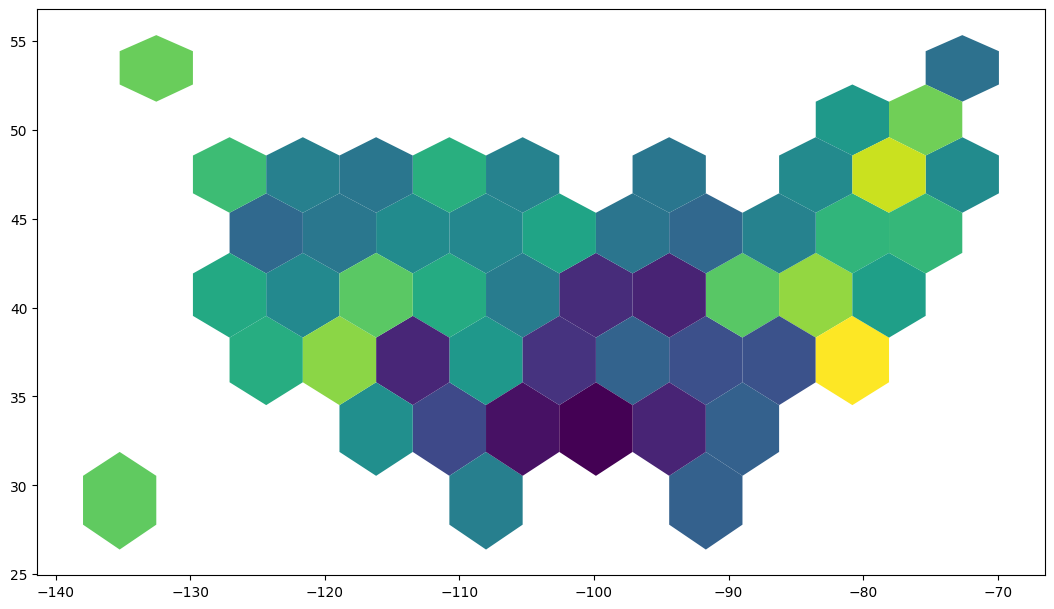

In [110]:
gdf_merged.plot(column="Income", cmap="BuGn")

In [130]:
income_min = df['Income'].min()
income_max = df['Income'].max()
population_min = df['Total_\n Population'].min()
population_max = df['Total_\n Population'].max()
education_min = df['Education_Bsc_over'].min()
education_max = df['Education_Bsc_over'].max()
crime_min = df['Crime_per_100k'].min()
crime_max = df['Crime_per_100k'].max()

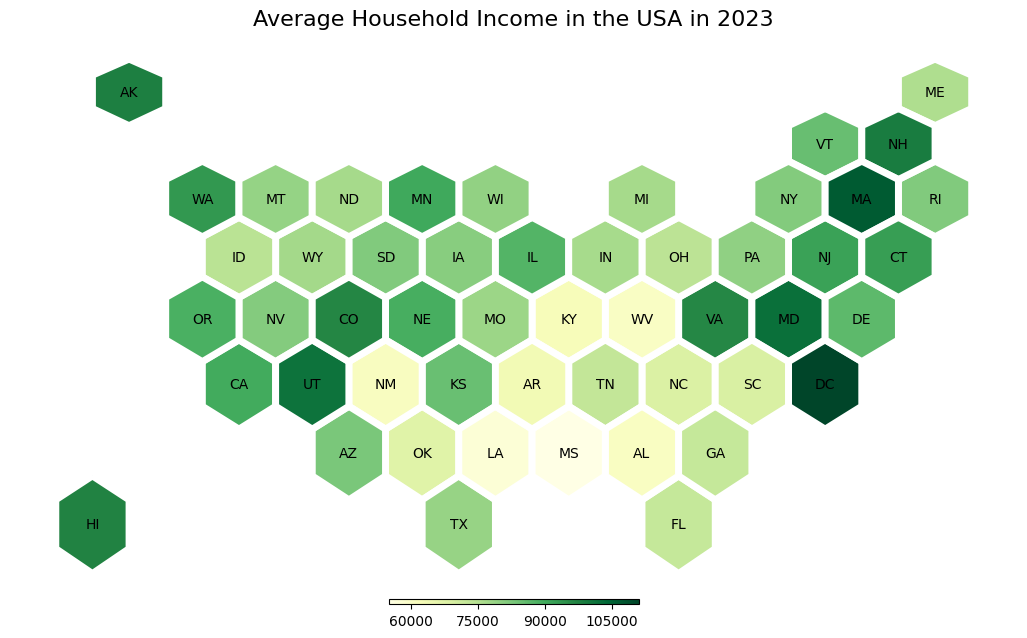

In [129]:
fig, ax = plt.subplots(1, figsize=(13, 13))

gdf_merged.plot(
    ax=ax,
    column="Income", 
    cmap="YlGn", 
    #norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='white', 
    linewidth=5
)

ax.axis('off')
for idx, row in gdf_merged.iterrows():
    ax.annotate(
        row['iso3166_2'],              
        xy=row['centroid'].coords[0],  
        horizontalalignment='center',
        verticalalignment='center',    
        color="black"
    )

plt.title("Average Household Income in the USA in 2023", fontsize=16)
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=income_min, vmax=income_max))
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
cbar.locator = MaxNLocator(nbins=4)
cbar.update_ticks()

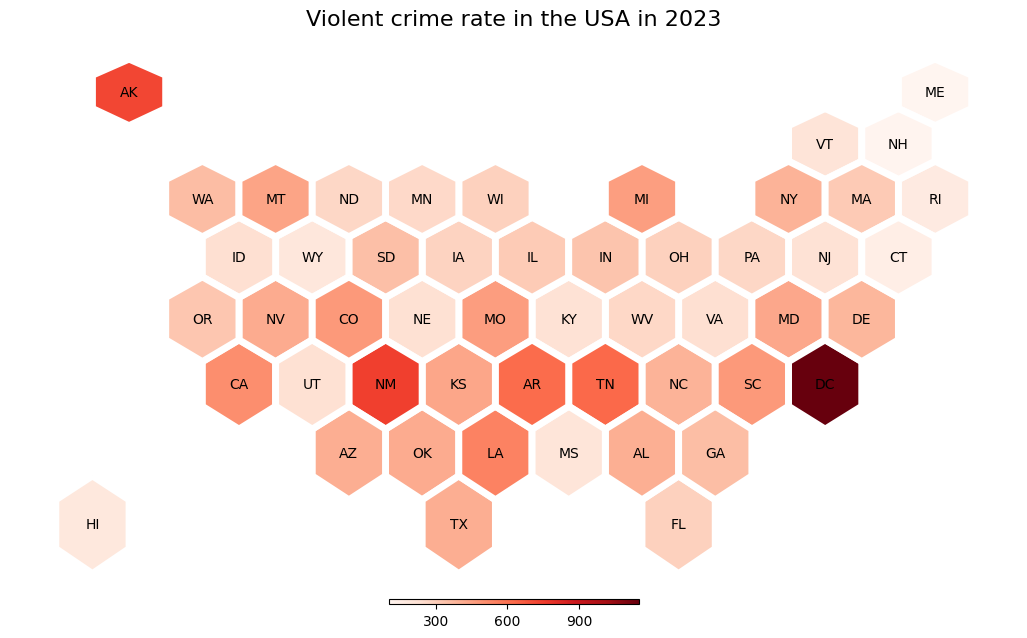

In [132]:
fig, ax = plt.subplots(1, figsize=(13, 13))

gdf_merged.plot(
    ax=ax,
    column="Crime_per_100k", 
    cmap="Reds", 
    #norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='white', 
    linewidth=5
)

ax.axis('off')
for idx, row in gdf_merged.iterrows():
    ax.annotate(
        row['iso3166_2'],              
        xy=row['centroid'].coords[0],  
        horizontalalignment='center',
        verticalalignment='center',    
        color="black"
    )

plt.title("Violent crime rate in the USA in 2023", fontsize=16)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=crime_min, vmax=crime_max))
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
cbar.locator = MaxNLocator(nbins=4)
cbar.update_ticks()

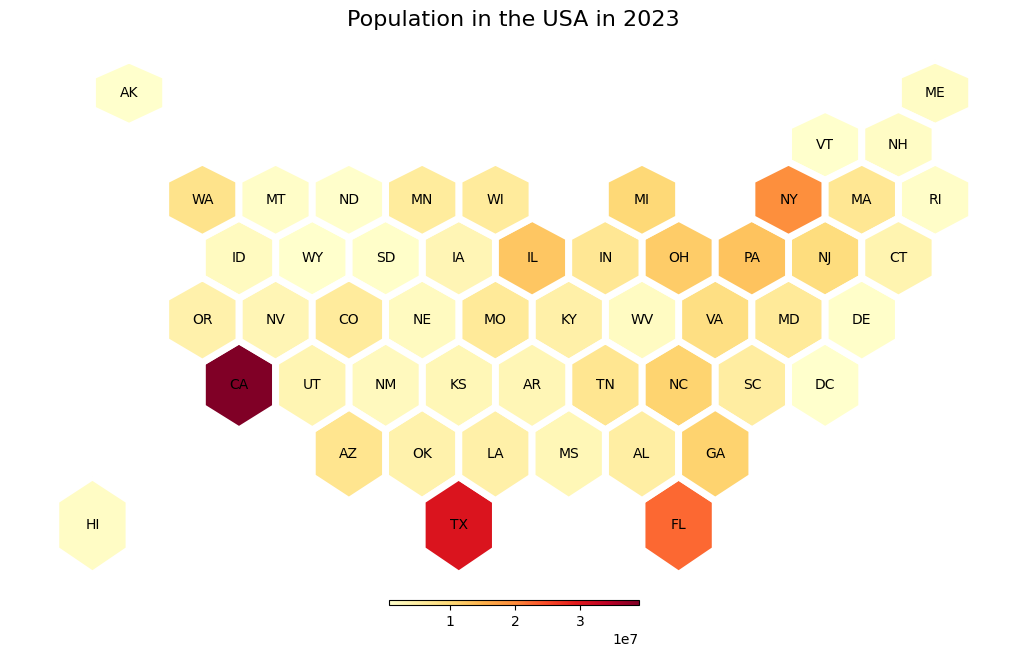

In [133]:
fig, ax = plt.subplots(1, figsize=(13, 13))

gdf_merged.plot(
    ax=ax,
    column="Total_\n Population", 
    cmap="YlOrRd", 
    #norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='white', 
    linewidth=5
)

ax.axis('off')
for idx, row in gdf_merged.iterrows():
    ax.annotate(
        row['iso3166_2'],              
        xy=row['centroid'].coords[0],  
        horizontalalignment='center',
        verticalalignment='center',    
        color="black"
    )

plt.title("Population in the USA in 2023", fontsize=16)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=population_min, vmax=population_max))
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
cbar.locator = MaxNLocator(nbins=4)
cbar.update_ticks()

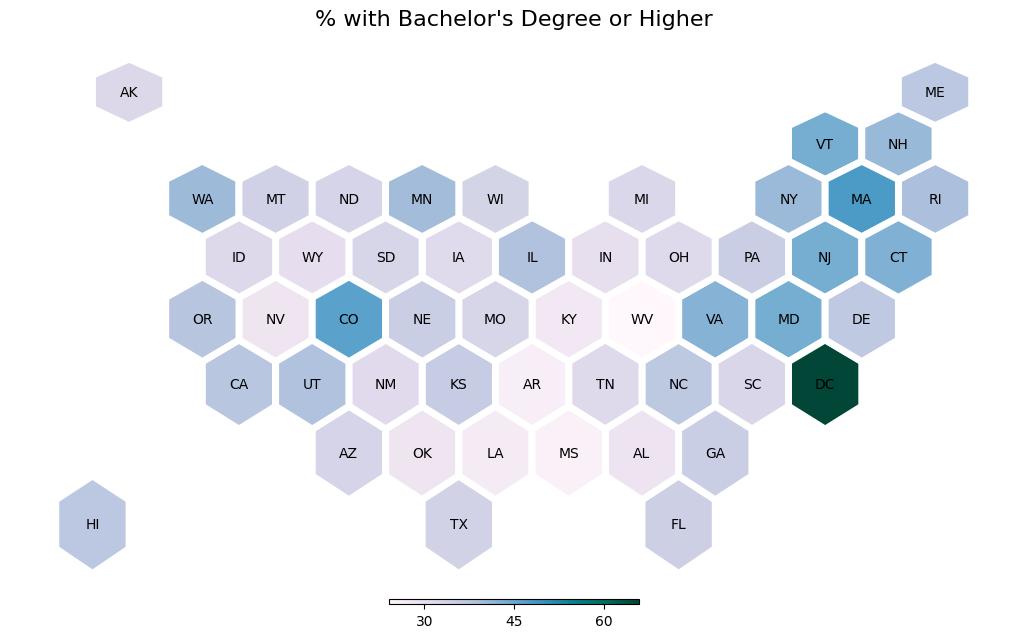

In [135]:
fig, ax = plt.subplots(1, figsize=(13, 13))

gdf_merged.plot(
    ax=ax,
    column="Education_Bsc_over", 
    cmap="PuBuGn", 
    #norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='white', 
    linewidth=5
)

ax.axis('off')
for idx, row in gdf_merged.iterrows():
    ax.annotate(
        row['iso3166_2'],              
        xy=row['centroid'].coords[0],  
        horizontalalignment='center',
        verticalalignment='center',    
        color="black"
    )

plt.title("% with Bachelor's Degree or Higher", fontsize=16)
sm = plt.cm.ScalarMappable(cmap='PuBuGn', norm=plt.Normalize(vmin=education_min, vmax=education_max))
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
cbar.locator = MaxNLocator(nbins=4)
cbar.update_ticks()